In [129]:
import pandas as pd
import numpy as np
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [4]:
df = pd.read_csv("D:/dat1/warranty.csv", sep=',')
print df.shape
df.head(2)

(24, 26)


,Row ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Return,Returned
0,41520,MA-2013-1850,10/14/2013,10/15/2013,First Class,DH-3675,Duane Huffman,Home Office,Antananarivo,Analamanga,...,Machines,"StarTech Printer, Red","$1,519.92",6.0,0.0,653.40,286.20,Critical,No,0
1,47596,CG-2012-2700,12/22/2012,12/24/2012,Second Class,DH-3675,Duane Huffman,Home Office,Kinshasa,Kinshasa,...,Bookcases,"Dania Classic Bookcase, Traditional",$410.76,1.0,0.0,176.61,73.81,High,No,0


In [3]:
df.dtypes

Row ID              int64
Order_ID           object
Order_Date         object
Ship_Date          object
Ship_Mode          object
Customer_ID        object
Customer Name      object
Segment            object
City               object
State              object
Country            object
Postal Code       float64
Market             object
Region             object
Product ID         object
Category           object
Sub-Category       object
Product Name       object
Sales              object
Quantity          float64
Discount          float64
Profit            float64
Shipping_Cost     float64
Order_Priority     object
Return             object
Returned            int64
dtype: object

In [4]:
# here is business question
# consolidate the data and produce a report to show country wise total sales of 
# every product belonging to the respective category

In [5]:
# remove the $ and comma from Sales variable
df['Sales'] = pd.to_numeric(df['Sales'].str.replace(r'[$,]',''))

In [128]:
# To explore the missing values 
print df.isnull().sum()


# Display the records for which Quantity is Null 
print df.loc[df.Quantity.isnull()]

'''
# Display all the records for which Null values found in any of the columns
print df.loc[df.isnull().any(axis=1)]

# filter the records based on a criteria
print df[(df.Sales > 411)]
'''


Row ID             0
Order_ID           0
Order_Date         0
Ship_Date          0
Ship_Mode          0
Customer_ID        0
Customer Name      0
Segment            0
City               0
State              0
Country            0
Postal Code       24
Market             0
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           2
Discount           0
Profit             0
Shipping_Cost      0
Order_Priority     0
Return             0
Returned           0
dtype: int64
    Row ID      Order_ID  Order_Date   Ship_Date       Ship_Mode Customer_ID  \
15   46792  IZ-2014-3850  12/11/2014  12/15/2014  Standard Class     DH-3675   
23   46793  IZ-2014-3850  12/11/2014  12/15/2014  Standard Class     DH-3675   

    Customer Name      Segment     City    State    ...    Sub-Category  \
15  Duane Huffman  Home Office  Baghdad  Baghdad    ...         Binders   
23  Duane Huffman  Home Office  Baghdad  Baghdad  

Axes(0.125,0.125;0.775x0.775)


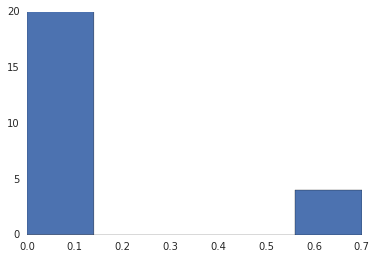

In [140]:
# df.hist()
print df.Discount.hist(bins=5)
# print df.Sales.hist(bins=5)

In [57]:
# Filter the records 

# df[(df.Sales > 411) & (df.Sub-Category != 'Chairs')]

# print df[(df.Sales > 411)]

# print df[(df.Ship_Mode == 'First Class')]
#print df.loc[(df.Sales > 0) & (df.State == 'Analamanga')]

# display a column which has a space in its values 
#print df[df['Ship_Mode'].str.contains("First|Class")]

print df[df['Ship_Mode'].str.contains("First").tolist()]


    Row ID      Order_ID  Order_Date   Ship_Date    Ship_Mode Customer_ID  \
0    41520  MA-2013-1850  10/14/2013  10/15/2013  First Class     DH-3675   
4    42850  TU-2013-3950    4/5/2013    4/6/2013  First Class     DH-3675   
10   42849  TU-2013-3950    4/5/2013    4/6/2013  First Class     DH-3675   
12   41521  MA-2013-1850  10/14/2013  10/15/2013  First Class     DH-3675   
21   42851  TU-2013-3950    4/5/2013    4/6/2013  First Class     DH-3675   

    Customer Name      Segment          City       State    ...     \
0   Duane Huffman  Home Office  Antananarivo  Analamanga    ...      
4   Duane Huffman  Home Office      Istanbul    Istanbul    ...      
10  Duane Huffman  Home Office      Istanbul    Istanbul    ...      
12  Duane Huffman  Home Office  Antananarivo  Analamanga    ...      
21  Duane Huffman  Home Office      Istanbul    Istanbul    ...      

   Sub-Category                  Product Name    Sales Quantity Discount  \
0      Machines         StarTech Printer

In [6]:
df.head(2)

,Row ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer Name,Segment,City,State,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Return,Returned
0,41520,MA-2013-1850,10/14/2013,10/15/2013,First Class,DH-3675,Duane Huffman,Home Office,Antananarivo,Analamanga,...,Machines,"StarTech Printer, Red",1519.92,6.0,0.0,653.40,286.20,Critical,No,0
1,47596,CG-2012-2700,12/22/2012,12/24/2012,Second Class,DH-3675,Duane Huffman,Home Office,Kinshasa,Kinshasa,...,Bookcases,"Dania Classic Bookcase, Traditional",410.76,1.0,0.0,176.61,73.81,High,No,0


In [6]:
df_agg = df.groupby(['Country','Category','Product Name']).agg({"Sales":"sum"})
print df_agg

                                                                                                Sales
Country                          Category        Product Name                                        
Algeria                          Office Supplies Ibico Binder Covers, Clear                     26.22
                                                 SanDisk Cards & Envelopes, Premium            581.04
Austria                          Technology      Apple Speaker Phone, Full Size                249.18
Bulgaria                         Office Supplies Tenex Shelving, Wire Frame                     53.73
                                                 Xerox Computer Printout Paper, Recycled        26.25
Canada                           Office Supplies Green Bar Computer Printout Paper, Recycled    29.67
Democratic Republic of the Congo Furniture       Dania Classic Bookcase, Traditional           410.76
                                 Technology      Apple Speaker Phone, VoIP        

In [9]:
print df_agg.columns

Index([u'Sales'], dtype='object')


In [10]:
pd.pivot_table(df,index=["Category"])

,Discount,Postal Code,Profit,Quantity,Returned,Row ID,Sales,Shipping_Cost
Category,,,,,,,,
Furniture,0.00000,NaN,81.2900,2.500000,0.0,46760.333333,321.440000,38.84000
Office Supplies,0.11875,NaN,9.7695,2.533333,0.5,43624.437500,77.220625,7.61375
Technology,0.12000,NaN,181.5924,3.000000,0.0,44890.000000,492.398000,75.77400


In [126]:
cty = pd.pivot_table(df,index=["Category"])
print cty.ix['Technology']

Discount             0.1200
Postal Code             NaN
Profit             181.5924
Quantity             3.0000
Returned             0.0000
Row ID           44890.0000
Sales              492.3980
Shipping_Cost       75.7740
Name: Technology, dtype: float64


In [127]:
pd.pivot_table(df,index=["Country"])

,Discount,Postal Code,Profit,Quantity,Returned,Row ID,Sales,Shipping_Cost
Country,,,,,,,,
Algeria,0.0,NaN,111.240,7.0,0.000000,42655.5,303.630000,18.865000
Austria,0.0,NaN,107.100,2.0,0.000000,48904.0,249.180000,39.000000
Bulgaria,0.0,NaN,7.530,1.0,1.000000,41745.5,39.990000,2.330000
Canada,0.0,NaN,2.670,1.0,0.000000,44931.0,29.670000,2.050000
Democratic Republic of the Congo,0.0,NaN,137.655,1.5,0.000000,47595.5,328.770000,46.425000
Egypt,0.0,NaN,58.800,4.0,0.000000,45892.0,534.720000,41.780000
Iraq,0.0,NaN,5.480,1.0,0.333333,46792.0,31.330000,1.863333
Madagascar,0.0,NaN,326.985,3.5,0.000000,41520.5,767.220000,145.760000
Nigeria,0.7,NaN,-55.044,6.0,1.000000,43461.0,56.920000,6.580000


In [14]:
pd.pivot_table(df,index=['Country','Category','Product Name'],fill_value=0)   

Discount  \
Country                          Category        Product Name                                            
Algeria                          Office Supplies Ibico Binder Covers, Clear                        0.0   
                                                 SanDisk Cards & Envelopes, Premium                0.0   
Austria                          Technology      Apple Speaker Phone, Full Size                    0.0   
Bulgaria                         Office Supplies Tenex Shelving, Wire Frame                        0.0   
                                                 Xerox Computer Printout Paper, Recycled           0.0   
Canada                           Office Supplies Green Bar Computer Printout Paper, Recycled       0.0   
Democratic Republic of the Congo Furniture       Dania Classic Bookcase, Traditional               0.0   
                                 Technology      Apple Speaker Phone, VoIP                         0.0   
Egypt                            Furniture       Novimex Rocking Chair, Set of Two                 0.0   
Iraq                             Furniture       Rubbermaid Light Bulb, Black                      0.0   
                                 Office Supplies SanDisk Message Books, Multicolor                 0.0   
                                                 Wilson Jones Binder, Clear                        0.0   
Madagascar                       Office Supplies Wilson Jones Binder, Durable                      0.0   
                                 Technology      StarTech Printer, Red                             0.0   
Nigeria                          Office Supplies Acco 3-Hole Punch, Durable                        0.7   
Russia                           Office Supplies BIC Pens, Water Color                             0.0   
                                                 Jiffy Business Envelopes, Recycled                0.0   
                                                 Kraft Peel and Seal, with clear poly window       0.0   
                                                 Wilson Jones Binding Machine, Durable             0.0   
                                 Technology      Logitech Memory Card, USB                         0.0   
Tanzania                         Office Supplies Cameo Peel and Seal, Recycled                     0.0   
Turkey                           Office Supplies Cuisinart Microwave, Red                          0.6   
                                                 Kleencut Ruler, Easy Grip                         0.6   
                                 Technology      Epson Phone, White                                0.6   

                                                                                              Postal Code  \
Country                          Category        Product Name                                               
Algeria                          Office Supplies Ibico Binder Covers, Clear                             0   
                                                 SanDisk Cards & Envelopes, Premium                     0   
Austria                          Technology      Apple Speaker Phone, Full Size                         0   
Bulgaria                         Office Supplies Tenex Shelving, Wire Frame                             0   
                                                 Xerox Computer Printout Paper, Recycled                0   
Canada                           Office Supplies Green Bar Computer Printout Paper, Recycled            0   
Democratic Republic of the Congo Furniture       Dania Classic Bookcase, Traditional                    0   
                                 Technology      Apple Speaker Phone, VoIP                              0   
Egypt                            Furniture       Novimex Rocking Chair, Set of Two                      0   
Iraq                             Furniture       Rubbermaid Light Bulb, Black                           0   
                             

In [13]:
# fill_value = 0
pd.pivot_table(df,index=['Country','Category','Product Name'], values=['Sales'])   


Sales
Country                          Category        Product Name                                        
Algeria                          Office Supplies Ibico Binder Covers, Clear                     26.22
                                                 SanDisk Cards & Envelopes, Premium            581.04
Austria                          Technology      Apple Speaker Phone, Full Size                249.18
Bulgaria                         Office Supplies Tenex Shelving, Wire Frame                     53.73
                                                 Xerox Computer Printout Paper, Recycled        26.25
Canada                           Office Supplies Green Bar Computer Printout Paper, Recycled    29.67
Democratic Republic of the Congo Furniture       Dania Classic Bookcase, Traditional           410.76
                                 Technology      Apple Speaker Phone, VoIP                     246.78
Egypt                            Furniture       Novimex Rocking Chair, Set of Two             534.72
Iraq                             Furniture       Rubbermaid Light Bulb, Black                   18.84
                                 Office Supplies SanDisk Message Books, Multicolor              25.23
                                                 Wilson Jones Binder, Clear                     49.92
Madagascar                       Office Supplies Wilson Jones Binder, Durable                   14.52
                                 Technology      StarTech Printer, Red                        1519.92
Nigeria                          Office Supplies Acco 3-Hole Punch, Durable                     56.92
Russia                           Office Supplies BIC Pens, Water Color                          69.84
                                                 Jiffy Business Envelopes, Recycled             18.36
                                                 Kraft Peel and Seal, with clear poly window    96.12
                                                 Wilson Jones Binding Machine, Durable          50.46
                                 Technology      Logitech Memory Card, USB                     414.36
Tanzania                         Office Supplies Cameo Peel and Seal, Recycled                  19.80
Turkey                           Office Supplies Cuisinart Microwave, Red                      111.38
                                                 Kleencut Ruler, Easy Grip                       6.07
                                 Technology      Epson Phone, White                             31.75

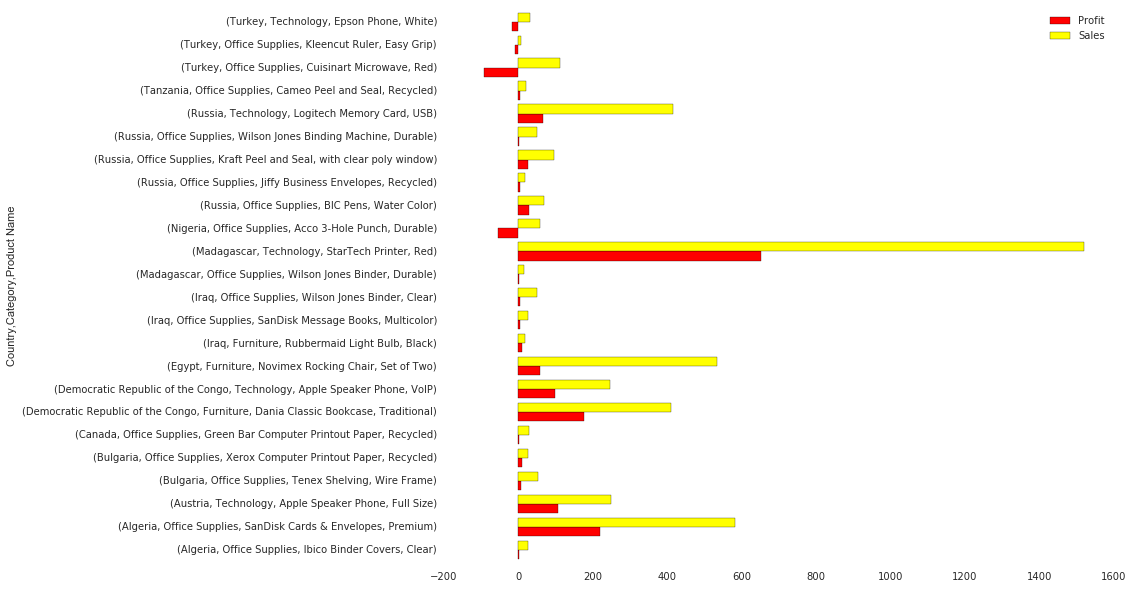

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

pivot = pd.pivot_table(df,index=['Country','Category','Product Name'], values=['Sales','Profit'])   
'''
pivot.ix['Russia'].plot(kind='bar', 
                        figsize=(7, 10), 
                        width=0.8, 
                        fontsize=10, 
                        colormap='autumn')
'''
pivot.plot(kind='barh', 
                        figsize=(12, 10), 
                        width=0.8, 
                        fontsize=10, 
                        colormap='autumn')
plt.savefig('D:/dat1/goo.png',transparent=True,pad_inches=150,dpi=60)

In [100]:
# fill_value = 0
pd.pivot_table(df,index=['Country','Category','Product Name'], values=['Sales'],margins=True)  
out= pd.pivot_table(df,index=['Country','Category','Product Name'], values=['Sales'],margins=True)  
out.to_excel("D:/dat1/out1.xls")

In [19]:
pd.pivot_table(df,index=['Country','Category','Product Name'], values=['Quantity','Sales','Profit'], 
               fill_value=0, aggfunc=[np.sum], margins=True)  

sum  \
                                                                                                Profit   
Country                          Category        Product Name                                            
Algeria                          Office Supplies Ibico Binder Covers, Clear                      1.800   
                                                 SanDisk Cards & Envelopes, Premium            220.680   
Austria                          Technology      Apple Speaker Phone, Full Size                107.100   
Bulgaria                         Office Supplies Tenex Shelving, Wire Frame                      6.420   
                                                 Xerox Computer Printout Paper, Recycled         8.640   
Canada                           Office Supplies Green Bar Computer Printout Paper, Recycled     2.670   
Democratic Republic of the Congo Furniture       Dania Classic Bookcase, Traditional           176.610   
                                 Technology      Apple Speaker Phone, VoIP                      98.700   
Egypt                            Furniture       Novimex Rocking Chair, Set of Two              58.800   
Iraq                             Furniture       Rubbermaid Light Bulb, Black                    8.460   
                                 Office Supplies SanDisk Message Books, Multicolor               4.020   
                                                 Wilson Jones Binder, Clear                      3.960   
Madagascar                       Office Supplies Wilson Jones Binder, Durable                    0.570   
                                 Technology      StarTech Printer, Red                         653.400   
Nigeria                          Office Supplies Acco 3-Hole Punch, Durable                    -55.044   
Russia                           Office Supplies BIC Pens, Water Color                          28.560   
                                                 Jiffy Business Envelopes, Recycled              3.300   
                                                 Kraft Peel and Seal, with clear poly window    25.920   
                                                 Wilson Jones Binding Machine, Durable           0.990   
                                 Technology      Logitech Memory Card, USB                      66.240   
Tanzania                         Office Supplies Cameo Peel and Seal, Recycled                   4.530   
Turkey                           Office Supplies Cuisinart Microwave, Red                      -91.896   
                                                 Kleencut Ruler, Easy Grip                      -8.808   
                                 Technology      Epson Phone, White                            -17.478   
All                                                                                           1295.724   

                                                                                                       \
                                                                                             Quantity   
Country                          Category        Product Name                                           
Algeria                          Office Supplies Ibico Binder Covers, Clear                       2.0   
                                                 SanDisk Cards & Envelopes, Premium              12.0   
Austria                          Technology      Apple Speaker Phone, Full Size                   2.0   
Bulgaria                         Office Supplies Tenex Shelving, Wire Frame                       1.0   
                                                 Xerox Computer Printout Paper, Recycled          1.0   
Canada                           Office Supplies Green Bar Computer Printout Paper, Recycled      1.0   
Democratic Republic of the Congo Furniture       Dania Classic Bookcase, Traditional              1.0   
                                 Technology      Apple Speaker Phone, VoIP      